<a href="https://colab.research.google.com/github/krag-harsh/SVM_implementation/blob/master/linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
def distances(X,y, w, with_lagrange=True):
  #considering 1 width of margin
  distances = y * (np.dot(X, w)) - 1
  if with_lagrange:  
      # if distance is more than 0 sample is not on the support vector hence Lagrange multiplier will be 0
      distances[distances > 0] = 0

  return distances

In [113]:
def get_cost_grads(X, w, y,C):
  distances_d = distances(X,y,w)
  dw = np.zeros(len(w))

  for ind, d in enumerate(distances_d):
      if d == 0:  # if sample is not on the support vector
          di = w  # (alpha * y[ind] * X[ind]) = 0
      else:
          # (alpha * y[ind] * X[ind]) = y[ind] * X[ind]
          di = w - (C * y[ind] * X[ind])
      dw += di
      
  return  dw / len(X)

In [114]:

def fit(num_of_epochs,X, w, y,C,lr):
  for i in range(num_of_epochs):
      dw = get_cost_grads(X, w, y,C)
      w = w - lr * dw
      if i % 1000 == 0:
        distances_d = distances(X,y,w)
        # Get current cost
        L = 1 / 2 * np.dot(w, w) - C * np.sum(distances_d)
        print(i, ' | ', L)
  print("\nFinal value of weight:\n",w)
  return w

dimension of x1 = x2 = (500, 2)


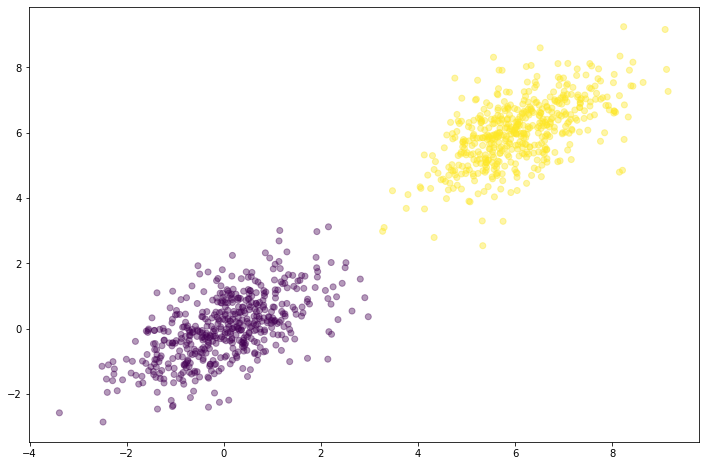

In [115]:
si = 500    #size of the data set we are creating
x1 = np.random.multivariate_normal([0, 0], [[1, .60],[.60, 1]], si)
x2 = np.random.multivariate_normal([6,6], [[1, .60],[.60, 1]], si)

print("dimension of x1 = x2 =",x1.shape)
sfeature=np.vstack((x1, x2)).astype(np.float32)     #concatinates axis 0
slabel=np.hstack((np.zeros(si), np.ones(si)))  
slabel[slabel==0]=-1


plt.figure(figsize=(12,8))
plt.scatter(sfeature[:, 0], sfeature[:, 1], c = slabel, alpha = .4)

In [116]:
X = np.column_stack((np.ones(len(sfeature)), sfeature)) 
w = np.zeros(len(X[0]))


w=fit(10000, X , w , slabel , C=300000 , lr=1e-3)


0  |  102550257661.10251
1000  |  39856.89060832364
2000  |  5388.64863682167
3000  |  728.7347909936382
4000  |  220961.14330441153
5000  |  29873.930090502683
6000  |  4039.248577707219
7000  |  546.106106367972
8000  |  45690.696774615135
9000  |  6177.378795287753

Final value of weight:
 [-39.72098986   6.6547077    7.22326541]


In [117]:
p=X@w
p=np.sign(p)
#p[p==-1]=0
p-=slabel.flatten()

print("Accuracy on training data |", len(np.where(p == 0)[0]) / len(p))   #should be one (as we are finding accuracy on the training data only)

Accuracy on training data | 1.0


References:

[towardsdatascience](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

[towardsdatascience](https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2)

[||source||](https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb)